In [1]:
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from math import sqrt

#model metrics
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import classification_report

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Estimators
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# RFE 
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

#Hot encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# Logging for Visual Comparison
#log_cols=["Classifier", "Accuracy", "Classification Report", "Cross validation", "Score", "LogLoss"]
#log = pd.DataFrame(columns=log_cols)

#https://www.kaggle.com/jeffd23/10-classifier-showdown-in-scikit-learn
def generate_accuracy_and_heatmap(model, x, y):
    train_predictions = model.predict(x)
    acc = accuracy_score(y, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    class_rep = classification_report(y, train_predictions )
    print("Classification Report:\n {}".format(class_rep))

    cross_val = cross_val_score(model, x, y)
    print("Cross Validation: {}".format(cross_val))

    #score
    score = model.score(x,y)
    print("Score: {}".format(score))

    #Predictions
    train_predictions_proba = model.predict_proba(x)
    ll = log_loss(y_test, train_predictions_proba)
    print("Log Loss: {}".format(ll))

#    log_entry = pd.DataFrame([[name, acc*100, class_rep, cross_val, score, ll]], columns=log_cols)
#    log = log.append(log_entry)

    print ("\n")
    print (pd.crosstab(pd.Series(train_predictions, name='Predicted'),
                       pd.Series(y,name='DEFAULT')))
    return 1

In [3]:
####################################################################################################
##                             1. Import and Prepare the Data                                     ##
####################################################################################################

rawDefaultCredit= pd.read_csv('dataset/default of credit card clients.csv', header =1)

# Data and Text Cleaning

# ID: represents the number of the observation and has no value, needs to get removed
rawDefaultCredit= rawDefaultCredit.drop("ID", axis=1)

# PAY_0 should be renamed PAY_1
# (the inplace parameter will change the dataframe without assignment)
rawDefaultCredit.rename(columns={"PAY_0": "PAY_1"}, inplace=True)

# Default Payment next month (not standard name needs to get renamed)
rawDefaultCredit.rename(columns={"default payment next month": "DEFAULT"}, inplace=True)

# Replace 4, 5, 6 to 0 to unify others to one unique value
rawDefaultCredit['EDUCATION'].replace([0, 5, 6], [4, 4, 4], inplace=True)

rawDefaultCredit.to_csv('dataset/defaultCreditCardClients.csv')

defaultCredit = rawDefaultCredit

In [4]:
defaultCredit['DEFAULT'] = defaultCredit['DEFAULT'].astype('category')
defaultCredit['SEX'] = defaultCredit['SEX'].astype('category')
defaultCredit['EDUCATION'] = defaultCredit['EDUCATION'].astype('category')
defaultCredit['MARRIAGE'] = defaultCredit['MARRIAGE'].astype('category')
defaultCredit['PAY_1'] = defaultCredit['PAY_1'].astype('category')
defaultCredit['PAY_2'] = defaultCredit['PAY_2'].astype('category')
defaultCredit['PAY_3'] = defaultCredit['PAY_3'].astype('category')
defaultCredit['PAY_4'] = defaultCredit['PAY_4'].astype('category')
defaultCredit['PAY_5'] = defaultCredit['PAY_5'].astype('category')
defaultCredit['PAY_6'] = defaultCredit['PAY_6'].astype('category')

In [5]:
#Dependent Variable Training Set (y Training)
#'No default', 'Default'
depVar = defaultCredit['DEFAULT']

#features x
allFeatures = defaultCredit.iloc[:,0:23]

#Training Data is divided into two parts: X-train and y_train
#Testing data follows the same rules and contains two sets: X_test and y_test (ground truth)
x_train, x_test, y_train, y_test = train_test_split(allFeatures, depVar, test_size=0.25, random_state=123)


In [6]:

classifiers = [
    GradientBoostingClassifier(),      #82.2267%
    AdaBoostClassifier(),              #81.8000%
    RandomForestClassifier(max_depth=10, n_estimators=50, max_features="auto"),  #81.5600%
    LinearDiscriminantAnalysis(),                 #81.2267%
    KNeighborsClassifier(n_neighbors=10),          #76.4400%
    DecisionTreeClassifier(max_depth=10),           #72.6000%
    SVC(gamma=2, C=1, probability=True),  #78.2533% Takes a long time to run
#    SVC(kernel='linear', C = 1.0)
#    SVC(kernel="rbf", C=0.025), #78.3067%
]

In [7]:
# Running all classifiers for all features

#allFeatures_model [];

for clf in classifiers:
    print("="*60)
    name = clf.__class__.__name__
    print(name)
    clf.fit(x_train, y_train)
    generate_accuracy_and_heatmap(clf, x_test, y_test)
print("="*60)
 

GradientBoostingClassifier
Accuracy: 82.2267%
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      5873
           1       0.65      0.38      0.48      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.66      0.69      7500
weighted avg       0.80      0.82      0.80      7500

Cross Validation: [0.828      0.81333333 0.812      0.826      0.82333333]
Score: 0.8222666666666667
Log Loss: 0.4247995136852493


DEFAULT       0    1
Predicted           
0          1276  338
1           194   46
AdaBoostClassifier
Accuracy: 81.8000%
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.66      0.33      0.44      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.64      0.67      7500
weighted avg       0.80      0.82      0.79      7500

In [8]:
#########################################################################################################    
######                                               RFE                                            #####
#########################################################################################################
target = 'DEFAULT'
X = defaultCredit.loc[:, defaultCredit.columns != target]
Y = defaultCredit.loc[:, defaultCredit.columns == target]
#X.shape
#Y.shape

rf_clf = RandomForestClassifier(max_depth=10, n_estimators=50, max_features=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

In [9]:
rfecv = RFECV(estimator=rf_clf, step=1, cv=10, scoring='accuracy')
rfecv = rfecv.fit(x_train, np.ravel(y_train))


In [10]:
print('Optimal number of features: ',rfecv.n_features_)
print('Best features: ', x_train.columns[rfecv.support_])


Optimal number of features:  8
Best features:  Index(['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'BILL_AMT2',
       'PAY_AMT1'],
      dtype='object')


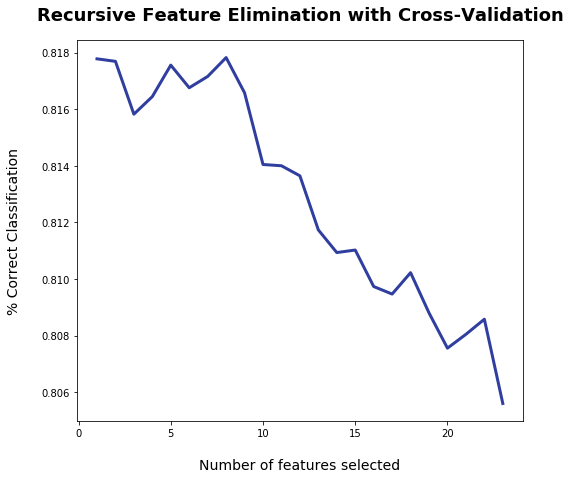

In [11]:

plt.figure(figsize=(8, 7))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

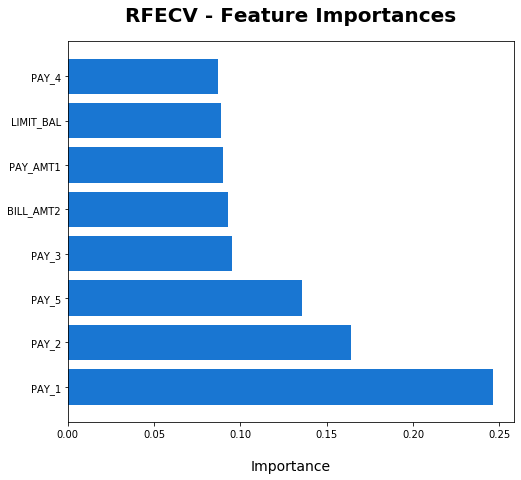

In [12]:

dset = pd.DataFrame()
dset['attr'] = x_train.columns[np.where(rfecv.support_ == True)[0]]
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)
dset

plt.figure(figsize=(8, 7))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [13]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)

print(x_train_rfecv)

[[140000 1 2 ... 0 63007 5200]
 [210000 0 0 ... -2 9378 1000]
 [20000 -1 0 ... -1 13050 1105]
 ...
 [50000 0 0 ... 0 48381 2002]
 [30000 0 0 ... 0 28530 2000]
 [370000 -2 -2 ... -2 25790 25794]]


In [14]:
rfecv_model = clf.fit(x_train_rfecv, np.ravel(y_train))
generate_accuracy_and_heatmap(rfecv_model, x_test_rfecv, np.ravel(y_test))
# 81.4400%

Accuracy: 78.2400%
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88      5873
           1       0.47      0.02      0.04      1627

    accuracy                           0.78      7500
   macro avg       0.63      0.51      0.46      7500
weighted avg       0.72      0.78      0.70      7500

Cross Validation: [0.78266667 0.78333333 0.784      0.78266667 0.776     ]
Score: 0.7824
Log Loss: 0.5213531871969377


DEFAULT       0     1
Predicted            
0          5830  1589
1            43    38


1

In [15]:
#Accuracy is:  0.8226666666666667
gbc_clf = GradientBoostingClassifier()
gbc_model = gbc_clf.fit(x_train_rfecv, np.ravel(y_train))
generate_accuracy_and_heatmap(gbc_model, x_test_rfecv, np.ravel(y_test))


Accuracy: 82.3200%
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89      5873
           1       0.66      0.38      0.48      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.66      0.69      7500
weighted avg       0.81      0.82      0.80      7500

Cross Validation: [0.826      0.814      0.81333333 0.83266667 0.812     ]
Score: 0.8232
Log Loss: 0.4272888552038286


DEFAULT       0     1
Predicted            
0          5561  1014
1           312   613


1

In [16]:
for clf in classifiers:
    print("="*60)
    name = clf.__class__.__name__
    print(name)
    clf.fit(x_train_rfecv, np.ravel(y_train))
    generate_accuracy_and_heatmap(clf, x_test_rfecv, np.ravel(y_test))
print("="*60)


GradientBoostingClassifier
Accuracy: 82.3200%
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89      5873
           1       0.66      0.38      0.48      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.66      0.69      7500
weighted avg       0.81      0.82      0.80      7500

Cross Validation: [0.826      0.814      0.81266667 0.83266667 0.81133333]
Score: 0.8232
Log Loss: 0.42730447123865806


DEFAULT       0     1
Predicted            
0          5561  1014
1           312   613
AdaBoostClassifier
Accuracy: 82.0800%
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.66      0.36      0.46      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500

Cross

In [17]:
#########################################################################################################    
######                                   One Hot Encoder                                            #####
#########################################################################################################
   

In [18]:
#One hot Encoding

#X = allFeatures
cat_columns = ['SEX', 'EDUCATION', 'MARRIAGE']

ohe_classifiers = [
    GradientBoostingClassifier(max_depth=2),      
    AdaBoostClassifier(),             
    RandomForestClassifier(max_depth=2, n_estimators=50, max_features="auto"),  
    LinearDiscriminantAnalysis(),                 
    KNeighborsClassifier(n_neighbors=2),         
    DecisionTreeClassifier(max_depth=2),          
]

In [19]:
# use when different features need different preprocessing
from sklearn.compose import make_column_transformer
col_transformer = make_column_transformer(
        (OneHotEncoder(drop='first'), cat_columns),
        remainder='passthrough')

X_ohe = col_transformer.fit_transform(defaultCredit)
X_ohe

#Dependent Variable Training Set (y Training)
depVar = defaultCredit['DEFAULT']

#Training Data is divided into two parts: X-train and y_train
#Testing data follows the same rules and contains two sets: X_test and y_test (ground truth)
X_train_ohe, X_test_ohe, Y_train_ohe, Y_test_ohe = train_test_split(X_ohe, depVar, test_size=0.25, random_state=123)


In [20]:
for clf in ohe_classifiers:
    print("="*60)
    name = clf.__class__.__name__
    print(name)
    clf.fit(X_train_ohe, Y_train_ohe)
    generate_accuracy_and_heatmap(clf, X_test_ohe, Y_test_ohe)
print("="*60)

GradientBoostingClassifier
Accuracy: 100.0000%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5873
           1       1.00      1.00      1.00      1627

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500

Cross Validation: [1. 1. 1. 1. 1.]
Score: 1.0
Log Loss: 1.4877390396612129e-05


DEFAULT       0    1
Predicted           
0          1138  296
1           332   88
AdaBoostClassifier
Accuracy: 100.0000%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5873
           1       1.00      1.00      1.00      1627

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500

Cross Validation: [1. 1. 1. 1. 1.]
Score: 1.0
L

In [21]:
#########################################################################################################    
######                                            Tunning                                           #####
#########################################################################################################

from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer

x_train, x_test, y_train, y_test = train_test_split(allFeatures, depVar, test_size=0.25, random_state=123)

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

calibrated_forest = CalibratedClassifierCV(
    base_estimator = RandomForestClassifier(n_estimators=10))

param_grid = { 'base_estimator__max_depth': [2, 4, 6, 8, 10, 12]}

search = GridSearchCV(calibrated_forest, param_grid, cv=5, scoring=scoring, refit='AUC', return_train_score=True)


search.fit(x_train, y_train)

results = search.cv_results_


In [22]:
results

{'mean_fit_time': array([0.27927608, 0.40963273, 0.54293928, 0.66525278, 0.78349948,
        0.89931397]),
 'std_fit_time': array([0.01028755, 0.0044278 , 0.0089557 , 0.00657796, 0.00395983,
        0.00295319]),
 'mean_score_time': array([0.03600435, 0.03831825, 0.0417212 , 0.0461256 , 0.05051055,
        0.05559754]),
 'std_score_time': array([0.0009383 , 0.00019403, 0.00010169, 0.00039924, 0.00049165,
        0.00017333]),
 'param_base_estimator__max_depth': masked_array(data=[2, 4, 6, 8, 10, 12],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'base_estimator__max_depth': 2},
  {'base_estimator__max_depth': 4},
  {'base_estimator__max_depth': 6},
  {'base_estimator__max_depth': 8},
  {'base_estimator__max_depth': 10},
  {'base_estimator__max_depth': 12}],
 'split0_test_AUC': array([0.76389629, 0.76804033, 0.77102292, 0.77519408, 0.77365204,
        0.77218081]),
 'split1_test_AUC': array([0.75171113, 0.

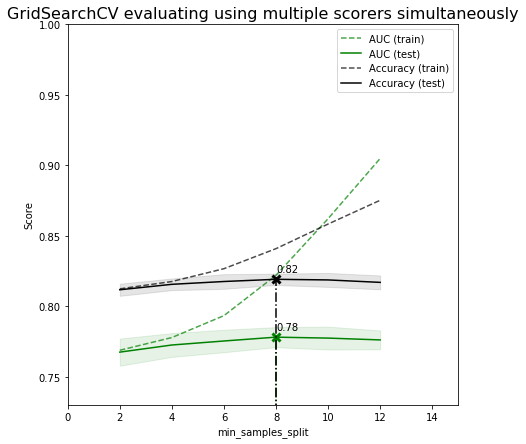

In [23]:
plt.figure(figsize=(7, 7))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 15)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_base_estimator__max_depth'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

In [24]:
# example of grid searching key hyperparameters for GradientBoostingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


#target = 'DEFAULT'
#X = defaultCredit.loc[:, defaultCredit.columns != target]
#y = defaultCredit.loc[:, defaultCredit.columns == target]

X = allFeatures
y = depVar
#X.shape

# define dataset
#X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [4, 6, 8]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

########## Best model
##########  0.821100 using {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6)}

In [25]:
x_train, x_test, y_train, y_test = train_test_split(allFeatures, depVar, test_size=0.25, random_state=123)
classifiers = [GradientBoostingClassifier(learning_rate= 0.1, max_depth= 4, n_estimators= 100, subsample= 1.0)
              ]

for clf in classifiers:
    print("="*60)
    name = clf.__class__.__name__
    print(name)
    clf.fit(x_train, y_train)
    generate_accuracy_and_heatmap(clf, x_test, y_test)
print("="*60)
 


GradientBoostingClassifier
Accuracy: 82.3067%
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89      5873
           1       0.66      0.38      0.48      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.66      0.69      7500
weighted avg       0.81      0.82      0.80      7500

Cross Validation: [0.824      0.81066667 0.806      0.82333333 0.81533333]
Score: 0.8230666666666666
Log Loss: 0.4235178324201281


DEFAULT       0    1
Predicted           
0          1272  336
1           198   48
